# Dataset Summary

The Haberman's survival dataset includes cases from a study done between 1958 and 1970 at the University of Chicago's Billings Hospital. 
The study focused on the survival of patients who had breast cancer surgery.

# The information of features

Objectives:
1. To classify the persons who are survived after the surgery and who are dead after the surgery from the given data set.
2. To find out model accuracy from Haberman's Survival Data
3. To find out survival metrics.
    



# Analysis:

### In this part, I am analyzing this dataset to answer the following questions

1. Determine the number of survivors and non-survivors with three axillary nodes involved.
2. How many patients have fewer than or exactly 6 lymph nodes?
3. What number of axillary nodes corresponds to the highest number of survivors?
4. To determine the maximum number of non-survivors, how many axil nodes are needed?
5. At what ages were the most people alive?
6. At what ages were not the most people alive?
7. For each age, what percentage survived and what percentage did not?
8. At what ages were people 100% alive?
9. At which ages did everyone pass away?
10. Which unique age values exhibit 100% survival and 100% non-survival across all combinations of operation_year and axil_nodes?

# Import the necessary packages

In [1]:
import pandas as pd  # Data analysis and manipulation 
import numpy as np   # Numerical operations

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
df=pd.read_csv('haberman.csv')
df.head()

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# Number of rows and columns.
print("Number of Rows:",df.shape[0],"\nNumber of Columns:",df.shape[1])


Number of Rows: 306 
Number of Columns: 4


# Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             306 non-null    int64
 1   operation_year  306 non-null    int64
 2   axil_nodes      306 non-null    int64
 3   status          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
# Checking of Missing Values
df.isnull().sum() 

age               0
operation_year    0
axil_nodes        0
status            0
dtype: int64

In [6]:
round(df.describe(),1)

,age,operation_year,axil_nodes,status
count,306.0,306.0,306.0,306.0
mean,52.5,62.9,4.0,1.3
std,10.8,3.2,7.2,0.4
min,30.0,58.0,0.0,1.0
25%,44.0,60.0,0.0,1.0
50%,52.0,63.0,1.0,1.0
75%,60.8,65.8,4.0,2.0
max,83.0,69.0,52.0,2.0


1. The average age of the patients was about 52 years, with the majority being between 44 and 61 years old.
2. The surgeries were performed between 1958 and 1969, with most taking place during the early to mid-1960s.
3. The median is 1 in axil_nodes, suggesting that half of the patients had 1 or fewer positive nodes.
4. 25th, 50th (Median) The values are 1, showing that the majority of patients survived. Only in the 75th percentile, the value 2, indicate that some patients did not survive.


In [7]:
corr_matrix= df.corr()
corr_matrix['status'].sort_values(ascending= False).round(2)

status            1.00
axil_nodes        0.29
age               0.07
operation_year   -0.00
Name: status, dtype: float64

In [8]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='operation_year', ylabel='age'>,
        <Axes: xlabel='axil_nodes', ylabel='age'>,
        <Axes: xlabel='status', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='operation_year'>,
        <Axes: xlabel='operation_year', ylabel='operation_year'>,
        <Axes: xlabel='axil_nodes', ylabel='operation_year'>,
        <Axes: xlabel='status', ylabel='operation_year'>],
       [<Axes: xlabel='age', ylabel='axil_nodes'>,
        <Axes: xlabel='operation_year', ylabel='axil_nodes'>,
        <Axes: xlabel='axil_nodes', ylabel='axil_nodes'>,
        <Axes: xlabel='status', ylabel='axil_nodes'>],
       [<Axes: xlabel='age', ylabel='status'>,
        <Axes: xlabel='operation_year', ylabel='status'>,
        <Axes: xlabel='axil_nodes', ylabel='status'>,
        <Axes: xlabel='status', ylabel='status'>]], dtype=object)

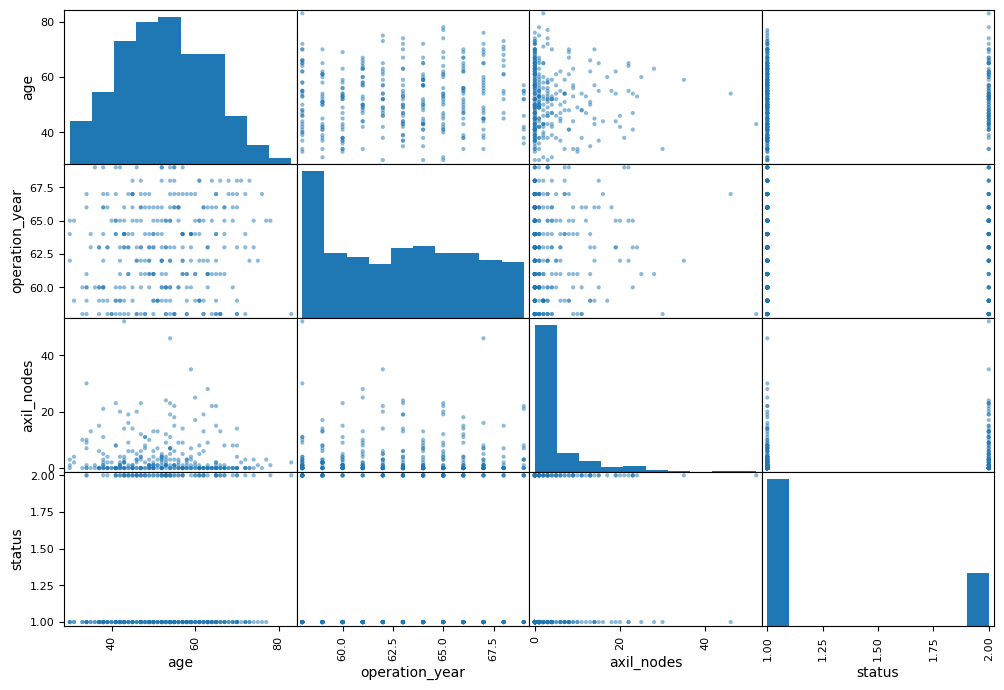

In [9]:
fields = ["age", "operation_year", "axil_nodes", "status"]

scatter_matrix(df[fields], figsize=(12,8))

<Axes: xlabel='status', ylabel='axil_nodes'>

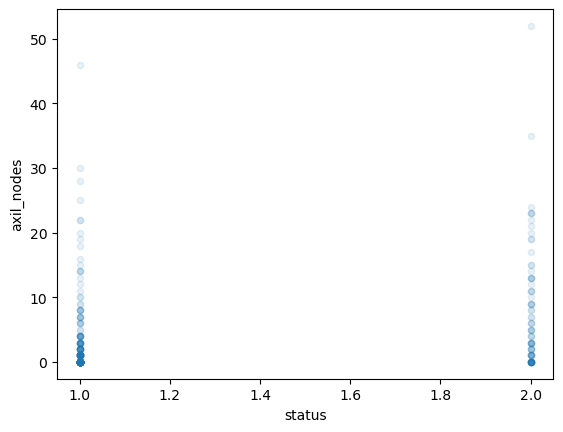

In [10]:
df.plot(kind = "scatter", x="status", y= "axil_nodes", alpha= 0.1)

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: axil_nodes, dtype: float64


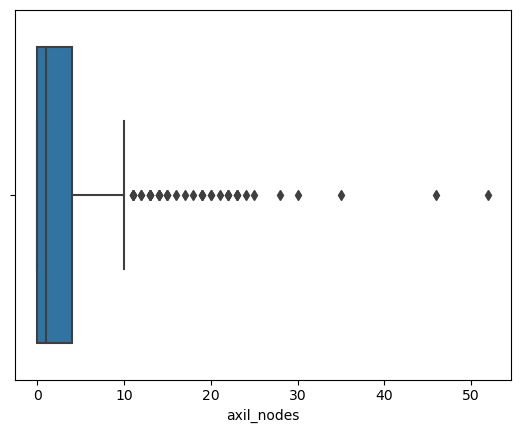

In [11]:
print(df['axil_nodes'].describe())
sns.boxplot(x=df['axil_nodes'])
plt.show()

# Analysing the target field

In [12]:
round(df.status.value_counts(normalize=True),3)

status
1    0.735
2    0.265
Name: proportion, dtype: float64

In this Dataset, 73.5% of patients survived while 26.5% did not survive. It is important to note that the Dataset is imbalanced, which may affect the results. I will do this in the next part

# Axillary_nodes vs Status

### Determine the number of survivors and non-survivors with three axillary nodes involved.

In [13]:
'''
axil_nodes3 = df[df.axil_nodes == 3]
count_survivors = axil_nodes3[axil_nodes3.status == 1].shape[0]
count_non_survivors = axil_nodes3[axil_nodes3.status == 2].shape[0] 
'''

axil_nodes3 = df[df.axil_nodes ==3].status.value_counts()
axil_nodes3

status
1    13
2     7
Name: count, dtype: int64

In [14]:
status_axil_nodes_counts = df.groupby(['axil_nodes', 'status']).size().unstack(fill_value=0)

status_axil_nodes_counts

status,1,2
axil_nodes,,
0,117,19
1,33,8
2,15,5
3,13,7
4,10,3
5,2,4
6,4,3
7,5,2
8,5,2


Based on the chart, patients with 16, 18, 25, 28, 30, and 46 axillary nodes survived 100%, 
while patients with 17, 21, 23, 24, 35, and 52 axillary nodes did not survive at all.

# How many patients have fewer than or exactly 6 lymph nodes?

In [15]:
count = sum(x <= 6 for x in df['axil_nodes'])

print(f"Number of patients with fewer than or exactly 6 lymph nodes: {count} Patients.\n")

percentage = (count / len(df['axil_nodes'])) * 100

print(f"Percentage of patients with 6 or fewer lymph nodes: {percentage:.2f}%")


Number of patients with fewer than or exactly 6 lymph nodes: 243 Patients.

Percentage of patients with 6 or fewer lymph nodes: 79.41%


## What number of axillary nodes corresponds to the highest number of survivors

In [16]:
max_survivor = df[df['status'] == 1]['axil_nodes'].value_counts()

max_survivors_count = max_survivor.max()


max_survivors_axil_nodes = max_survivor[max_survivor == max_survivors_count].index.tolist()

print(f"The axil_nodes values with the highest number of survivors are {max_survivors_axil_nodes} with {max_survivors_count} survivors each.")


The axil_nodes values with the highest number of survivors are [0] with 117 survivors each.


## To determine the maximum number of non-survivors, how many axil nodes are needed?

In [17]:
max_non_survivor = df[df['status']==2]['axil_nodes'].value_counts().sort_values(ascending=False)

max_non_survivors_axil_node = max_non_survivor.index[0]
max_non_survivors_count = max_non_survivor[max_non_survivors_axil_node]

print(f"The axil_nodes value with the highest number of non survivors is {(max_non_survivors_axil_node)} with {max_non_survivors_count}.")

The axil_nodes value with the highest number of non survivors is 0 with 19.


# Age VS Status

In [18]:
status_age_counts = df.groupby(['age', 'status']).size().unstack(fill_value=0)

status_age_counts

status,1,2
age,,
30,3,0
31,2,0
33,2,0
34,5,2
35,2,0
36,2,0
37,6,0
38,9,1
39,5,1


## At what ages were the most people alive?

In [19]:

age_survivor_counts = df[df['status'] == 1].groupby('age').size()

max_survivors_count = age_survivor_counts.max()
max_survivor_ages = age_survivor_counts[age_survivor_counts == max_survivors_count]

print(f"The age with the highest number of survivors is/are {list(max_survivor_ages.index)} with {max_survivors_count} survivors each.")

The age with the highest number of survivors is/are [50, 52] with 10 survivors each.


# At what ages were not the most people alive?

In [20]:
age_non_survivor_counts = df[df['status'] == 2].groupby('age').size()


max_non_survivors_count = age_non_survivor_counts.max()
max_non_survivor_ages = age_non_survivor_counts[age_non_survivor_counts == max_non_survivors_count]


print(f"The age with the highest number of survivors is/are {list(max_non_survivor_ages.index)} with {max_non_survivors_count}.")

The age with the highest number of survivors is/are [53] with 6.


# For each age, what percentage survived and what percentage did not?

In [21]:
status_age_counts = df.groupby(['age', 'status']).size().unstack(fill_value=0)

status_age_percentages = status_age_counts.apply(lambda x: x / x.sum() * 100, axis=1)

print(status_age_percentages.round(1))

status      1      2
age                 
30      100.0    0.0
31      100.0    0.0
33      100.0    0.0
34       71.4   28.6
35      100.0    0.0
36      100.0    0.0
37      100.0    0.0
38       90.0   10.0
39       83.3   16.7
40      100.0    0.0
41       70.0   30.0
42       77.8   22.2
43       63.6   36.4
44       57.1   42.9
45       66.7   33.3
46       42.9   57.1
47       72.7   27.3
48       57.1   42.9
49       80.0   20.0
50       83.3   16.7
51       66.7   33.3
52       71.4   28.6
53       45.5   54.5
54       69.2   30.8
55       80.0   20.0
56       71.4   28.6
57       72.7   27.3
58      100.0    0.0
59       87.5   12.5
60       66.7   33.3
61       66.7   33.3
62       57.1   42.9
63       87.5   12.5
64      100.0    0.0
65       60.0   40.0
66       60.0   40.0
67       66.7   33.3
68      100.0    0.0
69       75.0   25.0
70       71.4   28.6
71      100.0    0.0
72       75.0   25.0
73      100.0    0.0
74       50.0   50.0
75      100.0    0.0
76      100.0

# At what ages were people 100% alive?

In [22]:
#age_total_counts = df.groupby('age').size()

age_total_counts = df['age'].value_counts()


age_survivor_counts = df[df['status'] == 1].groupby('age').size()

age_survivor_percentages = (age_survivor_counts / age_total_counts) * 100


max_survivor_percentage = age_survivor_percentages.max()
max_survivor_ages = age_survivor_percentages[age_survivor_percentages == max_survivor_percentage]


print(f"The age(s) with the highest percentage of survivors is/are {list(max_survivor_ages.index)} with   {max_survivor_percentage:.2f}% survivors each.")

The age(s) with the highest percentage of survivors is/are [30, 31, 33, 35, 36, 37, 40, 58, 64, 68, 71, 73, 75, 76, 77] with   100.00% survivors each.


# At which ages did everyone pass away?

In [23]:
#age_total_counts = df['age'].value_counts()
age_total_counts = df.groupby('age').size().sort_values(ascending=False)


age_non_survivors_counts = df[df['status'] == 2].groupby('age').size()


age_non_survivors_percentages = (age_non_survivors_counts / age_total_counts) * 100


max_non_survivors_percentage = age_non_survivors_percentages.max()
max_non_survivors_ages = age_non_survivors_percentages[age_non_survivors_percentages == max_non_survivors_percentage]


print(f"The age with the highest percentage of non-survivors is/are {list(max_non_survivors_ages.index)} with a {max_non_survivors_percentage:.2f}% mortality rate.")


The age with the highest percentage of non-survivors is/are [78, 83] with a 100.00% mortality rate.


# Operation Year VS Status

In [24]:
df.operation_year.value_counts()

operation_year
58    36
64    31
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: count, dtype: int64

### Which unique age values exhibit 100% survival and 100% non-survival across all combinations of operation_year and axil_nodes?

In [25]:

status_counts = df.groupby(['age', 'operation_year', 'axil_nodes', 'status']).size().unstack(fill_value=0)

status_percentages = status_counts.apply(lambda x: x / x.sum() * 100, axis=1)


print(round(status_percentages),2)


status                             1      2
age operation_year axil_nodes              
30  62             3           100.0    0.0
    64             1           100.0    0.0
    65             0           100.0    0.0
31  59             2           100.0    0.0
    65             4           100.0    0.0
...                              ...    ...
75  62             1           100.0    0.0
76  67             0           100.0    0.0
77  65             3           100.0    0.0
78  65             1             0.0  100.0
83  58             2             0.0  100.0

[283 rows x 2 columns] 2


count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: axil_nodes, dtype: float64


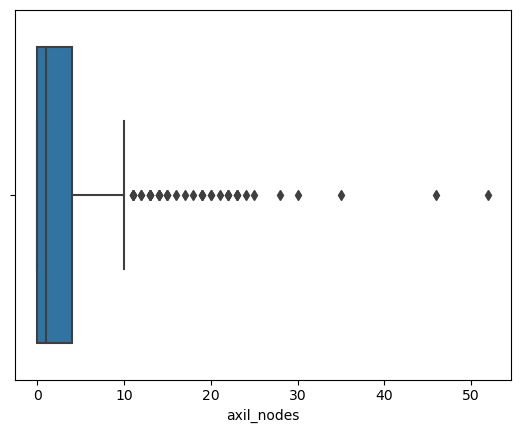

In [26]:
print(df['axil_nodes'].describe())
sns.boxplot(x=df['axil_nodes'])
plt.show()